In [281]:
#part1 EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import time

In [289]:
df = pd.read_csv('/Users/mia/Desktop/treasury yield curve data.csv') 
df.info()

#conclusion: there are missing valus in our dataset. We drop the missing value from our data later. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8635 entries, 0 to 8634
Data columns (total 32 columns):
Date         8353 non-null object
SVENF01      8353 non-null float64
SVENF02      8353 non-null float64
SVENF03      8353 non-null float64
SVENF04      8353 non-null float64
SVENF05      8353 non-null float64
SVENF06      8353 non-null float64
SVENF07      8353 non-null float64
SVENF08      8353 non-null float64
SVENF09      8353 non-null float64
SVENF10      8353 non-null float64
SVENF11      8353 non-null float64
SVENF12      8353 non-null float64
SVENF13      8353 non-null float64
SVENF14      8353 non-null float64
SVENF15      8353 non-null float64
SVENF16      8353 non-null float64
SVENF17      8353 non-null float64
SVENF18      8353 non-null float64
SVENF19      8353 non-null float64
SVENF20      8353 non-null float64
SVENF21      8353 non-null float64
SVENF22      8353 non-null float64
SVENF23      8353 non-null float64
SVENF24      8353 non-null float64
SVENF25      8353 n

In [290]:
#get basic information including mean, standard deviation,and percentile quantiles.
df.dropna(inplace=True)
df.describe()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,...,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,...,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,...,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,...,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,...,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.649900,10.741400,10.766300,10.747500,10.701500,10.640000,...,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.150118


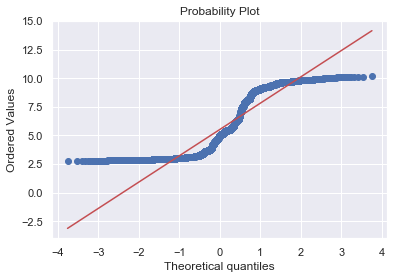

In [291]:
# draw a Q-Q Plot
stats.probplot(df.Adj_Close, dist="norm", plot=plt)
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


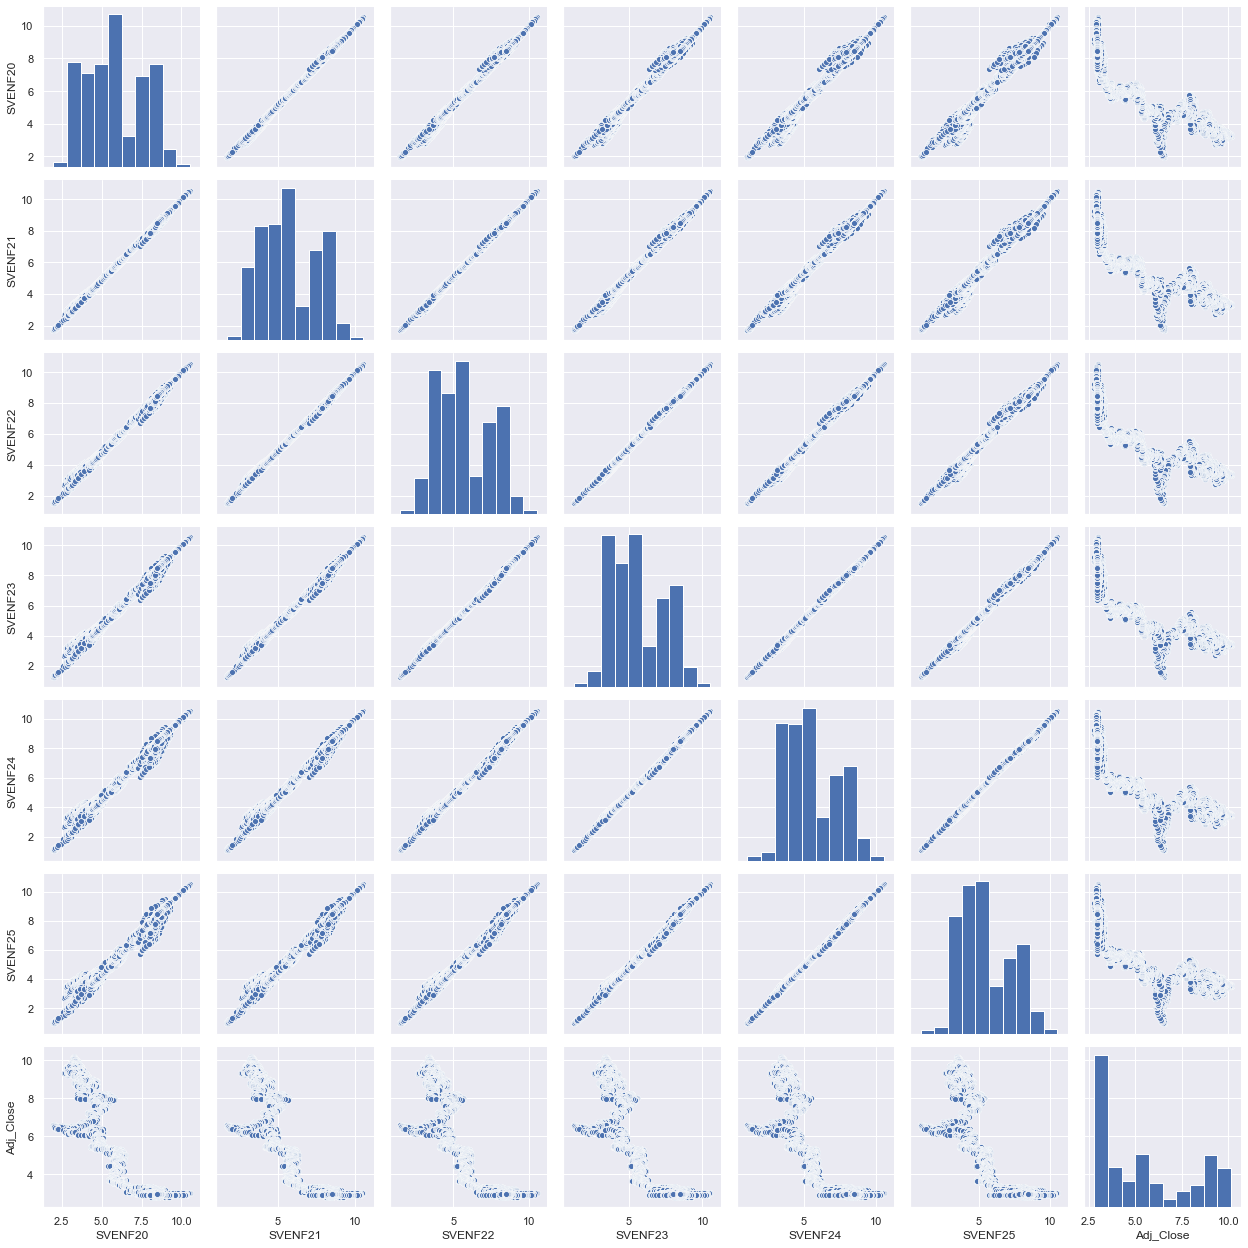

In [292]:
#pair comparision plots 
import sklearn 
columns = ['SVENF20','SVENF21','SVENF22','SVENF23','SVENF24','SVENF25','Adj_Close']
sns.pairplot(df[columns], size=2.5)
plt.tight_layout()
plt.show()


In [293]:
corrMatrix = pd.DataFrame(df[['SVENF10', 'SVENF11', 'SVENF12', 'SVENF13', 'SVENF14', 'Adj_Close']].corr())
corrMatrix

# most of the X attributes are highly correlated to Adj_Close, the target variable of our dataset.

,SVENF10,SVENF11,SVENF12,SVENF13,SVENF14,Adj_Close
SVENF10,1.000000,0.999550,0.998305,0.996313,0.993536,-0.905134
SVENF11,0.999550,1.000000,0.999577,0.998303,0.996126,-0.908136
SVENF12,0.998305,0.999577,1.000000,0.999556,0.998159,-0.911199
SVENF13,0.996313,0.998303,0.999556,1.000000,0.999509,-0.913843
SVENF14,0.993536,0.996126,0.998159,0.999509,1.000000,-0.915651
Adj_Close,-0.905134,-0.908136,-0.911199,-0.913843,-0.915651,1.000000


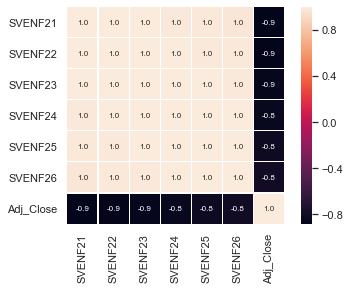

In [294]:
#draw a heatmap 
cm = np.corrcoef(df[['SVENF21','SVENF22','SVENF23','SVENF24','SVENF25','SVENF26','Adj_Close']].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm,linewidths = 0.1,cbar=True,annot=True,square=True,fmt='.1f',annot_kws={'size': 8},
                 yticklabels=['SVENF21','SVENF22','SVENF23','SVENF24','SVENF25','SVENF26','Adj_Close'],
                 xticklabels=['SVENF21','SVENF22','SVENF23','SVENF24','SVENF25','SVENF26','Adj_Close'])

In [308]:
#part2 (do linear regression and svm without using pca)
x = df.iloc[:, 1:31]
y = df.iloc[:, 31]
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=42)
#X_train= X_train.values.reshape(-1, 1)
#y_train= y_train.values.reshape(-1, 1)
#X_test = X_test.values.reshape(-1, 1)
#y_test= y_test.values.reshape(-1, 1)
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
# Standardize the features
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_train = mms.fit_transform(y_train)
y_test = mms.transform(y_test)
#scalerX = StandardScaler().fit(X_train)
#scalery = StandardScaler().fit(y_train)
#X_train = scalerX.transform(X_train)
#y_train = scalery.transform(y_train)
#X_test = scalerX.transform(X_test)
#y_test = scalery.transform(y_test)


In [309]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#np.where(np.isnan(y))
start = time.clock()
model = LinearRegression().fit(X_train, y_train)
print(model.coef_)
#print R^2 for train data
r_sq = model.score(X_train, y_train)
print(r_sq)

r_sq1 = model.score(X_test, y_test)
print(r_sq1)
#print RMSE FOR training data and testing
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print(RMSE)
RMSE1 = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print(RMSE1)
end = time.clock()
print('Run time: ', end - start, 's')

[[  -1.74209314   18.05601776  -79.50362437  178.28689279 -199.58179055
    64.47665975   80.18558905  -82.65661605  -11.96186441   85.67966428
   -76.32217114   52.50255606   -0.23207592  -22.41199214  -24.70499287
    -1.90320889  -76.1229696    54.10702263   34.00038231   33.01470599
   138.49961126  -95.08318818   43.1476239  -102.49449768 -195.04972913
    58.72040574   25.36791629  208.50203185  -20.1023629   -84.92582726]]
0.9022730353400429
0.904130953533737
0.10568051677260158
0.10645834077269573
Run time:  0.023033999999995558 s


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [310]:
from sklearn.svm import SVR
start = time.clock()
regressor=SVR(kernel="rbf", degree=1)
regressor.fit(X_train,y_train)
print(regressor.score(X_train, y_train))

print(regressor.score(X_test,y_test))



0.9801625228846407
0.9815563011489161


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [311]:
RMSE_1 = np.sqrt(mean_squared_error(y_train, regressor.predict(X_train)))
print(RMSE_1)
RMSE_2 = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
print(RMSE_2)
print(regressor.intercept_)
end = time.clock()
print('Run time: ', end - start, 's')

0.04761359161360448
0.04669436786503252
[0.46107123]
Run time:  0.2407440000000065 s


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [301]:
#part3 using PCA and then do linear regression and svm
from sklearn.decomposition import PCA

In [302]:
#pca = PCA(n_components=3)
#pca.fit(x)
from sklearn.decomposition import PCA
x = df.iloc[:, 1:31]
y = df.iloc[:, 31]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=42)
sc = StandardScaler()

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

mms = MinMaxScaler()
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
y_train_pca = mms.fit_transform(y_train)
y_test_pca = mms.transform(y_test)

pca=PCA(n_components=3)
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.fit_transform(X_test_std)

print('Explained variance ratio: ', pca.explained_variance_ratio_)

Explained variance ratio:  [0.93067768 0.0418521  0.02150743]


In [304]:
from sklearn.linear_model import LinearRegression
start = time.clock()
model1 = LinearRegression().fit(X_train_pca, y_train_pca)
print(model1.coef_)

r_sq_pca = model1.score(X_train_pca, y_train_pca)
print(r_sq_pca)
r_sq_pca1 = model1.score(X_test_pca,y_test_pca)
print(r_sq_pca1)

RMSE1 = np.sqrt(mean_squared_error(y_train_pca, model1.predict(X_train_pca)))
print(RMSE1)
RMSE2 = np.sqrt(mean_squared_error(y_test_pca, model1.predict(X_test_pca)))
print(RMSE2)

end = time.clock()
print('Run time: ', end - start, 's')

[[-0.05764596 -0.06619403  0.03614012]]
0.8672181160186355
0.8636574057368397
0.12318480388760006
0.12695688727255697
Run time:  0.01118900000000167 s


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()


In [305]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
start = time.clock()
svr.fit(X_train_pca,y_train_pca)
#y_predict
y_pred_pca = svr.predict(X_test_pca)

train_rsq1 = svr.score(X_train_pca, y_train_pca)
train_RMSE_pca1 = np.sqrt(mean_squared_error(y_train_pca,svr.predict(X_train_pca)))
test_rsq2 = svr.score(X_test_pca, y_test_pca)
test_RMSE_pca2 = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))
print(svr.intercept_)
print(train_rsq1)
print(test_rsq2)
print(train_RMSE_pca1)
print(test_RMSE_pca2)

end = time.clock()
print('Run time: ', end - start, 's')

[0.34380457]
0.960876088680638
0.9597537906606795
0.06686654075564376
0.0689767900876334
Run time:  0.1577530000000138 s


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 

In [312]:
#part4 - conclusions 
#In terms of our EDA,  most X attritubtes are highly correlated to the target variable. 
#On untransformed data, I think SVM regressor fits a better model,
#since it gives a larger R square and smaller root of mean square error - higher accuracy degree. 

#After doing PCA to reduce dimension, the R squares we got from using linear regression are decreased, and the RMSEs are decreased as well.
# running time decreases.

#After doing PCA to reduce dimension, the R squares we got from using SVM regressor are increased, but the RMSEs are decreased. 
#running time decreases. 

#Other things, we drop all missing values to clean this dataset. Perhaps there are different results if we replace missing values with mean of target variables.


In [ ]:
#part5 - appendix
print(my github link is "")